In [1]:
%load_ext google.cloud.bigquery

# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information form over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 12 years ago. So if today is 2021.02.15 then the weather we want to forecast is for the date 2009.02.16. You are suppsed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to used BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is, to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck at the first part, you can use the replacement data provided in the second part

In [2]:
%%bigquery 
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


Downloading: 100%|██████████| 20/20 [00:02<00:00,  9.79rows/s]


,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,36010,99999,1929,11,14,42.000000,4,40.200001,4.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
1,37950,99999,1929,12,28,39.700001,4,38.299999,4.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
2,38560,99999,1930,6,29,58.500000,4,NaN,NaN,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
3,39730,99999,1930,5,26,54.000000,4,49.000000,4.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
4,36010,99999,1930,4,28,53.700001,4,NaN,NaN,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
5,39530,99999,1931,3,18,50.799999,4,47.400002,4.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
6,38640,99999,1931,5,17,51.500000,4,46.900002,4.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
7,726810,24131,1931,9,4,79.900002,24,39.000000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
8,726810,24131,1931,12,2,18.500000,24,13.800000,8.0,NaN,...,NaN,None,0.0,NaN,True,True,True,True,True,True
9,726810,24131,1931,11,8,54.799999,24,32.200001,8.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2009 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [3]:
# CAUTION, in order to predict snow 12 years ago we need data for 2010 as well, so I just move the time-series window
# to 2005 - 2010
from google.cloud import bigquery

bqclient = bigquery.Client()

query = """
SELECT CAST(CONCAT(year,"-",month,"-",day) AS DATE) AS date, * 
FROM `bigquery-public-data.samples.gsod` 
WHERE year BETWEEN 2006 AND 2010
    AND station_number BETWEEN 725300 AND 726300
"""

data = (bqclient.query(query).result().to_dataframe())


### 2. Task 
From here want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2009. 

In [4]:
import pandas as pd
import math

In [5]:
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2006-04-27,725526,99999,2006,4,27,55.000000,4,33.400002,4.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
1,2006-09-25,725835,99999,2006,9,25,64.800003,4,17.100000,4.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
2,2006-03-24,725495,99999,2006,3,24,34.200001,8,29.500000,8.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
3,2006-02-01,725868,99999,2006,2,1,31.299999,8,30.000000,8.0,...,NaN,None,0.02,24.0,True,True,True,True,True,True
4,2006-04-01,725868,99999,2006,4,1,35.000000,9,34.599998,9.0,...,NaN,None,0.10,NaN,True,True,True,True,True,True


In [6]:
filtered_data_by_station_number = data[data['station_number'].between(725300,725330)]
filtered_data_by_station_number.reset_index(inplace=True, drop=True)

In [7]:
filtered_data_by_station_number.columns

Index(['date', 'station_number', 'wban_number', 'year', 'month', 'day',
       'mean_temp', 'num_mean_temp_samples', 'mean_dew_point',
       'num_mean_dew_point_samples', 'mean_sealevel_pressure',
       'num_mean_sealevel_pressure_samples', 'mean_station_pressure',
       'num_mean_station_pressure_samples', 'mean_visibility',
       'num_mean_visibility_samples', 'mean_wind_speed',
       'num_mean_wind_speed_samples', 'max_sustained_wind_speed',
       'max_gust_wind_speed', 'max_temperature', 'max_temperature_explicit',
       'min_temperature', 'min_temperature_explicit', 'total_precipitation',
       'snow_depth', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado'],
      dtype='object')

Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate. 

In [8]:
# after a first look at the available data it seems that a lot of fields are present (*._samples) that do not have any 
# valuable information for our use-case (based on the assumption that the fields are correctly labeled)
# same applies to year, month, day and the wban_number which do not have any value for us as well
# this results in a manual feature selection in the following

In [9]:
samples = filtered_data_by_station_number.filter(regex=(".*_samples"))
samples

,num_mean_temp_samples,num_mean_dew_point_samples,num_mean_sealevel_pressure_samples,num_mean_station_pressure_samples,num_mean_visibility_samples,num_mean_wind_speed_samples
0,24,24.0,NaN,NaN,24.0,24.0
1,24,24.0,NaN,NaN,24.0,24.0
2,24,24.0,NaN,NaN,24.0,24.0
3,18,18.0,NaN,NaN,18.0,18.0
4,24,24.0,NaN,NaN,24.0,24.0
...,...,...,...,...,...,...
15557,24,24.0,24.0,NaN,24.0,24.0
15558,24,24.0,24.0,NaN,24.0,24.0
15559,24,24.0,24.0,NaN,24.0,24.0
15560,24,24.0,24.0,24.0,24.0,24.0


In [10]:
def delete_sample_columns(data):
    filtered_data = data.drop(columns=['num_mean_temp_samples', 'num_mean_dew_point_samples', 'num_mean_sealevel_pressure_samples',
                             'num_mean_station_pressure_samples', 'num_mean_visibility_samples', 'num_mean_wind_speed_samples'])
    return filtered_data

def delete_date_columns(data):
    filtered_data = data.drop(columns=['year', 'month', 'day'])
    return filtered_data

def delete_wban_column(data):
    filtered_data = data.drop(columns=['wban_number'])
    return filtered_data

In [11]:
# and recognized that max_temperature_explicit, min_temperature_explicit and min_temperature use boolean as type (max_temperature_explicit)
# or have "none" or NaN values only (min_temperature_explicit, min_temperature), no real information gain as well
def delete_temperature_explicit_columns(data):
    filtered_data = data.drop(columns=['max_temperature_explicit', 'min_temperature_explicit', 'min_temperature'])
    return filtered_data

In [12]:
filtered_data_by_station_number = delete_sample_columns(filtered_data_by_station_number)
filtered_data_by_station_number = delete_date_columns(filtered_data_by_station_number)
filtered_data_by_station_number = delete_wban_column(filtered_data_by_station_number)
filtered_data_by_station_number = delete_temperature_explicit_columns(filtered_data_by_station_number)

# Note: on an intuitive level, snow_depth also makes no sense to keep it, however, lets check
# correlation first

In [13]:
# Now check for nan values:
feature_columns = [x for x in filtered_data_by_station_number.columns.tolist() if x != "snow" and x != "date"]

def check_if_column_has_nan_values(data, column):
    return (column, filtered_data_by_station_number[column].isnull().values.any(), filtered_data_by_station_number[column].isnull().sum())

nan_values = [check_if_column_has_nan_values(filtered_data_by_station_number, x) for x in feature_columns]
nan_values

[('station_number', False, 0),
 ('mean_temp', False, 0),
 ('mean_dew_point', True, 2),
 ('mean_sealevel_pressure', True, 1569),
 ('mean_station_pressure', True, 15276),
 ('mean_visibility', True, 3),
 ('mean_wind_speed', True, 5),
 ('max_sustained_wind_speed', True, 9),
 ('max_gust_wind_speed', True, 5557),
 ('max_temperature', True, 2),
 ('total_precipitation', True, 152),
 ('snow_depth', True, 15059),
 ('fog', False, 0),
 ('rain', False, 0),
 ('hail', False, 0),
 ('thunder', False, 0),
 ('tornado', False, 0)]

In [14]:
# it can be seen that a lot of data is missing some values (snow_depth, mean_station_pressure, max_gust_wind_speed)
# lets check the correlation to get more insight

In [15]:
correlation_matrix = filtered_data_by_station_number.corr()
correlation_matrix['snow']

station_number             -0.009668
mean_temp                  -0.088404
mean_dew_point             -0.018742
mean_sealevel_pressure     -0.068699
mean_station_pressure      -0.060517
mean_visibility            -0.466942
mean_wind_speed            -0.001578
max_sustained_wind_speed    0.041220
max_gust_wind_speed         0.112406
max_temperature            -0.073857
total_precipitation         0.100985
snow_depth                  0.136975
fog                         1.000000
rain                        1.000000
snow                        1.000000
hail                        1.000000
thunder                     1.000000
tornado                     1.000000
Name: snow, dtype: float64

In [16]:
# it seems that columns representing weather phenomena are identical with snow, the following problems evolve:
# first, combinations of these phenomena does not really make sense (I assume that rain is not present while snowing)
# second, our model would learn that these features are 100% correct indicators while predicting snow which 
# would distort our test results, therefore, I decided to delete them
def delete_weather_target_columns(data):
    filtered_data = data.drop(columns=['thunder', 'tornado', 'hail', 'rain', 'fog'])
    return filtered_data

filtered_data_by_station_number = delete_weather_target_columns(filtered_data_by_station_number)

In [17]:
# Due to the sheer amount of missing data and correlation, I decided to remove features snow_depth, max_gust_wind_speed 
# mean_station_pressure
def delete_dedicated_feature_columns(data):
    filtered_data = data.drop(columns=['snow_depth', 'max_gust_wind_speed', 'mean_station_pressure'])
    return filtered_data

In [18]:
filtered_data_by_station_number = delete_dedicated_feature_columns(filtered_data_by_station_number)

In [19]:
# fill up the rest with the mean
filtered_data_by_station_number = filtered_data_by_station_number.fillna(filtered_data_by_station_number.mean())

numeric_feature_columns = [x for x in filtered_data_by_station_number.columns.tolist() if x != "snow" and x != "date"]
nan_values = [check_if_column_has_nan_values(filtered_data_by_station_number, x) for x in numeric_feature_columns]
nan_values

/Users/tim/7learningsFirst/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


[('station_number', False, 0),
 ('mean_temp', False, 0),
 ('mean_dew_point', False, 0),
 ('mean_sealevel_pressure', False, 0),
 ('mean_visibility', False, 0),
 ('mean_wind_speed', False, 0),
 ('max_sustained_wind_speed', False, 0),
 ('max_temperature', False, 0),
 ('total_precipitation', False, 0)]

In [20]:
# data is clean, lets split it up

### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for is the following, and hence should constitute your test set.

In [21]:
import datetime, timedelta

day_to_predict = str(datetime.datetime.today()- datetime.timedelta(days=12*365)).split(' ')[0]

In [22]:
filtered_data_by_station_number.columns

Index(['date', 'station_number', 'mean_temp', 'mean_dew_point',
       'mean_sealevel_pressure', 'mean_visibility', 'mean_wind_speed',
       'max_sustained_wind_speed', 'max_temperature', 'total_precipitation',
       'snow'],
      dtype='object')

In [23]:
filtered_data_by_station_number['station_number'].unique()

array([725326, 725317, 725320, 725327, 725316, 725305, 725314, 725315,
       725300, 725330])

In [24]:
# the data is already sorted by date, so no action required here
# However, we need to create train, val and test set for each and every station
features_df = filtered_data_by_station_number

features_df["snow"] = filtered_data_by_station_number["snow"].astype(int)

In [25]:
stations = features_df.station_number.unique()

In [26]:
def get_data_for_station(complete_data, station_number):
    return complete_data[complete_data['station_number'] == station_number]

<AxesSubplot:xlabel='date'>

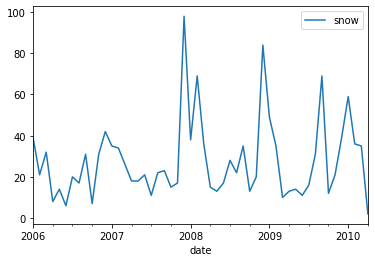

In [29]:
features_df[['date','snow']].set_index('date').resample('m').sum().plot()

In [30]:
features_df.shape

(15562, 11)

In [31]:
features_df['year'] = pd.DatetimeIndex(features_df['date']).year
features_df['month'] = pd.DatetimeIndex(features_df['date']).month



In [32]:
rows_of_day_to_predict = features_df[features_df['date'] == day_to_predict]

In [33]:
features_df = features_df.drop(features_df[features_df['date'] == day_to_predict].index)
features_df.reset_index(inplace=True, drop=True)

In [34]:
def split_data(data, train_size_in_percent=0.60, val_size_in_percent=0.20):
    train_indices = []
    val_indices = []
    test_indices = []
    
    for year in features_df['year'].unique():
        year_data = data[data['year'] == year]
        
        for month in year_data['month'].unique():
            month_data = year_data[year_data['month'] == month].sort_values(by="date")
            amount_of_rows = month_data.shape[0]
            
            month_indices = month_data.index.tolist()
            
            train_rows_count = math.floor(train_size_in_percent * amount_of_rows)
            train_indices.extend(month_indices[0:train_rows_count - 1])
            
            val_rows_count =  math.floor(val_size_in_percent * amount_of_rows)
            val_indices.extend(month_indices[train_rows_count: train_rows_count + val_rows_count - 1])
            
            test_indices.extend(month_indices[train_rows_count + val_rows_count:len(month_indices)])
            
    return (data.iloc[train_indices].sort_values(by="date"), 
            data.iloc[val_indices].sort_values(by="date"), 
            data.iloc[test_indices].sort_values(by="date"))

train_df, val_df, test_df = split_data(features_df)

In [35]:
# add the days that should be predicted for the time-traveler to the test-set
test_df = test_df.append(rows_of_day_to_predict, ignore_index=True)

## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an Algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [36]:
import datetime, timedelta

str(datetime.datetime.today()- datetime.timedelta(days=12*365)).split(' ')[0]

'2010-02-02'

You are allowed to use any library you are comfortable with such as sklearn, tensorflow keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

In [228]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

from sklearn import metrics
import numpy as np

In [38]:
def delete_date_columns(data):
    filtered_data = data.drop(columns=['year', 'month', 'date'])
    return filtered_data
train_df = delete_date_columns(train_df)
val_df = delete_date_columns(val_df)
test_df = delete_date_columns(test_df)

In [40]:
one_hot_station_encoder = OneHotEncoder()
one_hot_station_encoder.fit(filtered_data_by_station_number['station_number'].to_numpy().reshape(-1, 1))

OneHotEncoder()

In [244]:
def get_feature_matrix_and_targets(df):
    targets = df['snow'].to_numpy()
    df = df.drop(columns=['snow'])
    
    feature_matrix = df.to_numpy()
    station_number_vec = feature_matrix[:,0].reshape(-1, 1)
    encoded_station_number = one_hot_station_encoder.transform(station_number_vec).toarray()
    feature_matrix = feature_matrix[:, 1:]
    
    return np.hstack((feature_matrix, encoded_station_number)), targets

def print_precision_recall(targets, predicts):
    precision, recall, _, _ = precision_recall_fscore_support(targets, predicts, average='binary')
    #precision = precision_score(targets, predicts)
    print(f"Precision {precision}")
    print(f"Recall {recall}")

In [183]:
model = RandomForestClassifier(n_estimators=10)

In [259]:
model = LinearRegression() # Kernel

In [229]:
model = GaussianNB()

In [260]:
train_feature_matrix, train_targets = get_feature_matrix_and_targets(train_df)
model.fit(train_feature_matrix, train_targets)

LinearRegression()

In [261]:
val_feature_matrix, val_targets = get_feature_matrix_and_targets(val_df)
val_predicts = model.predict(val_feature_matrix)

In [262]:
np.sum(val_targets)

293

In [263]:
val_predicts = val_predicts >= 0.5
val_predicts = val_predicts.astype(int)

In [264]:
print_precision_recall(val_targets, val_predicts)

Precision 0.5882352941176471
Recall 0.20477815699658702


In [265]:
test_feature_matrix, test_targets = get_feature_matrix_and_targets(test_df)
test_predicts=model.predict(test_feature_matrix)

In [267]:
test_predicts = test_predicts >= 0.5
test_predicts = test_predicts.astype(int)

In [268]:
print_precision_recall(test_targets, test_predicts)

Precision 0.6545454545454545
Recall 0.1267605633802817


In [166]:
rows_of_day_to_predict.reset_index(inplace=True, drop=True)
rows_of_day_to_predict

,date,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_temperature,total_precipitation,snow,year,month
0,2010-02-02,725314,34.400002,23.700001,1019.000000,10.0,4.2,11.1,30.200001,0.00,0,2010,2
1,2010-02-02,725315,30.799999,25.100000,1018.700012,8.1,6.5,14.0,27.000000,0.00,0,2010,2
2,2010-02-02,725316,31.500000,25.500000,1018.500000,9.1,6.4,13.0,26.600000,0.00,0,2010,2
3,2010-02-02,725326,29.200001,25.900000,1016.982834,5.5,7.6,15.9,23.000000,0.00,0,2010,2
4,2010-02-02,725317,32.799999,23.799999,1018.599976,9.6,6.0,13.0,30.200001,0.00,0,2010,2
5,2010-02-02,725327,28.500000,24.200001,1019.099976,4.7,4.3,8.0,24.799999,0.06,0,2010,2
6,2010-02-02,725305,28.700001,24.700001,1018.599976,3.3,5.1,11.1,26.600000,0.03,1,2010,2
7,2010-02-02,725320,32.000000,24.900000,1018.400024,6.6,6.3,9.9,21.000000,0.02,0,2010,2
8,2010-02-02,725330,28.500000,23.200001,1020.200012,6.0,3.8,8.0,10.900000,0.04,1,2010,2
9,2010-02-02,725300,29.100000,24.500000,1018.900024,4.0,5.6,8.0,14.000000,0.06,0,2010,2


In [126]:
def predict_tt_for_station_number(station_number, model, data):
    OKGREEN = '\033[92m'
    FAIL = '\033[91m'
    
    data = delete_date_columns(data)
    station_df = data[data['station_number'] == station_number]
    features, target = get_feature_matrix_and_targets(station_df)
    
    prediction = model.predict(features)
    if prediction[0] == target[0]:   
        print(f"{OKGREEN}Correct: predicted:{prediction[0]} == target:{target[0]} {OKGREEN}")
    else:
        print(f"{FAIL}Wrong: prediction:{prediction[0]} != target:{target[0]} {FAIL}")

In [127]:
predict_tt_for_station_number(725305, model, rows_of_day_to_predict)

Wrong: prediction:0 != target:1 
